In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.io

In [2]:
def load_svhn(path):
    
    matfile = scipy.io.loadmat(path)
    images = matfile['X']
    images = np.expand_dims(images,0)
    images = np.swapaxes(images, 0,4)
    images = np.squeeze(images)
    labels = matfile['y']
    labels = np.squeeze(labels)
    print(len(labels))
    
    validation_images = images[:10000,:,:,:]
    training_images = images[10000:,:,:,:]
    validation_labels = labels[:10000]
    training_labels = labels[10000:]
    
    return training_images, training_labels, validation_images, validation_labels


training_data, training_labels, validation_data, validation_labels = load_svhn('./SVHN/train_32x32.mat')

73257


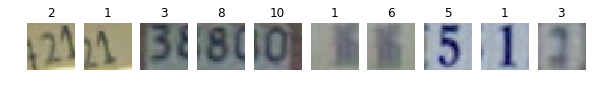

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    ax[i].imshow(training_data[i])
    ax[i].set_title(training_labels[i])
    ax[i].axis("off")

In [4]:
training_labels -= 1
validation_labels -= 1

In [5]:
print(training_data.shape)
print(training_labels)

(63257, 32, 32, 3)
[1 0 2 ... 0 5 8]


In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="tanh", input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="tanh"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="tanh"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="tanh"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="tanh"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation="tanh"))
model.add(tf.keras.layers.Dense(256, activation="tanh"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph')

model.fit(training_data, training_labels,
          epochs=5,
          batch_size=200,
#          callbacks=[tensorboard]
         )

val_loss, val_acc = model.evaluate(validation_data, validation_labels)
print("loss:", val_loss)
print("accuracy:", val_acc)

Epoch 1/5
63257/63257 [==============================] - 7s 106us/step - loss: 0.8936 - acc: 0.7106
Epoch 2/5
63257/63257 [==============================] - 6s 96us/step - loss: 0.4931 - acc: 0.8519
Epoch 3/5
63257/63257 [==============================] - 6s 96us/step - loss: 0.4175 - acc: 0.8733
Epoch 4/5
63257/63257 [==============================] - 6s 96us/step - loss: 0.3792 - acc: 0.8829
Epoch 5/5
10000/10000 [==============================] - 1s 84us/step
loss: 0.40525634717941283
accuracy: 0.8788
